In [27]:
import pickle
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Helper_Code import *

In [24]:
# Uploading the DataSet
DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")

In [25]:
DataFrames[0]

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,3.46271,0.064536,-47.48990,99.7924,-74.9919,-44.9309,-174.7840,0.0,0.0,0.0,0.0,-0.269271,0.034541,450.314,0.558501
1,0.942293,33.0326,3.48953,0.013280,15.09410,60.6287,-92.4775,-18.0366,-153.1060,0.0,0.0,0.0,0.0,-0.255965,-0.020072,450.942,0.562828
2,1.535590,33.0326,3.50999,-0.018973,-27.05100,130.7770,-73.8357,21.3053,-204.6120,0.0,0.0,0.0,0.0,-0.238435,-0.050661,451.536,0.566128
3,2.128890,33.0326,3.50074,-0.057691,-7.20450,210.1000,-27.1359,56.5126,-237.2360,0.0,0.0,0.0,0.0,-0.245486,-0.087106,452.129,0.564635
4,2.722180,33.0326,3.45467,-0.068517,-4.44727,213.8220,18.4878,47.1953,-195.3340,0.0,0.0,0.0,0.0,-0.291523,-0.098783,452.722,0.557205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,3.12049,0.117108,211.47100,214.5260,148.8580,194.3390,-65.6682,0.0,0.0,0.0,0.0,-0.166139,0.090287,536.550,0.503305
17996,87.142900,-32.9978,3.19540,0.200734,-59.11520,430.0830,62.3087,280.0960,-367.7750,0.0,0.0,0.0,0.0,-0.073013,0.178854,537.143,0.515388
17997,87.736100,-32.9978,3.02203,0.270963,-15.18650,770.1350,59.6885,331.3610,-710.4470,0.0,0.0,0.0,0.0,-0.241682,0.251439,537.736,0.487425
17998,88.329300,-32.9978,2.81474,0.214140,-6.64627,1037.3900,-37.8643,473.3800,-1075.2500,0.0,0.0,0.0,0.0,-0.439731,0.198363,538.329,0.453990


In [26]:
wfluc_TS_Allpoints = pd.read_pickle('wfluc_TS_Allpoints_Full.pkl.gz')
ufluc_TS_Allpoints = pd.read_pickle('ufluc_TS_Allpoints_Full.pkl.gz')

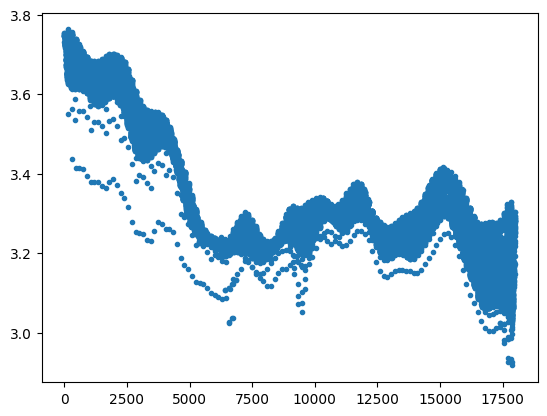

In [28]:
x = DataFrames[800]["Umean"].index
y = DataFrames[800]["Umean"].values

plt.scatter(x, y, marker= '.')
plt.show()

In [29]:
X, Y = IndexToLocation(DataFrames, np.arange(18000))
X = X.values.reshape(150, 120)
Y = Y.values.reshape(150, 120)

In [30]:
df_800 = DataFrames[800]
df_800

,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73198,0.029995,0.537474,0.151676,-3.73198,-0.029995,450.314,0.0
1,0.942293,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74550,0.033352,0.531254,0.148314,-3.74550,-0.033352,450.942,0.0
2,1.535590,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74843,0.031688,0.532074,0.148811,-3.74843,-0.031688,451.536,0.0
3,2.128890,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74622,0.029415,0.536284,0.157544,-3.74622,-0.029415,452.129,0.0
4,2.722180,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74620,0.030266,0.540452,0.162781,-3.74620,-0.030266,452.722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28663,0.026822,0.654904,0.219418,-3.28663,-0.026822,536.550,0.0
17996,87.142900,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26842,0.021879,0.646911,0.216320,-3.26842,-0.021879,537.143,0.0
17997,87.736100,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26372,0.019525,0.647714,0.217231,-3.26372,-0.019525,537.736,0.0
17998,88.329300,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25447,0.015776,0.650972,0.218226,-3.25447,-0.015776,538.329,0.0


#### $\bullet$ Plotting U_mean

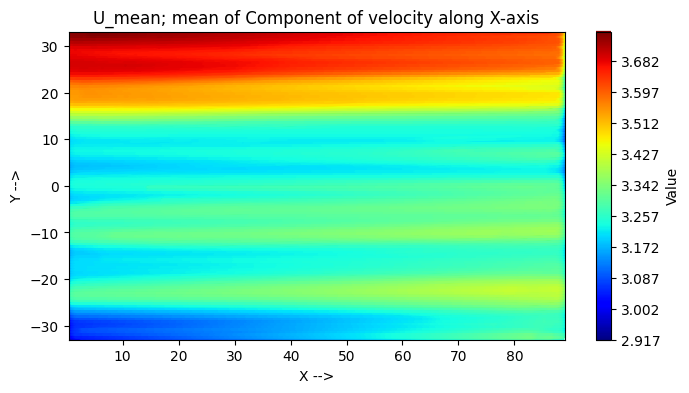

In [31]:
# Creating contour plot of Z_TKE
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, df_800["Umean"].values.reshape(150, 120), cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('U_mean; mean of Component of velocity along X-axis')
plt.xlabel('X -->')
plt.ylabel('Y -->')
plt.grid(True)
plt.show()

#### $\bullet$ Turbulent Kinetic Energy

$$\text{TKE} = \frac{1}{2}\{\overline{u_x'^2} + \overline{u_y'^2} + \overline{u_z'^2} \}$$   

Where, $u_x'$ is the Flutuating Component Along x - axis

In [32]:
Z_TKE = 0.5*(df_800['Urms']**2 + df_800['Vrms']**2).values.reshape(150, 120)

In [44]:
test = 0.5*(df_800['Urms']**2 + df_800['Vrms']**2)

test.to_csv("TKE.csv", index = False, header =True)

In [51]:
test2 = pd.read_csv("TKE.csv")
test2.min()

0    0.070308
dtype: float64

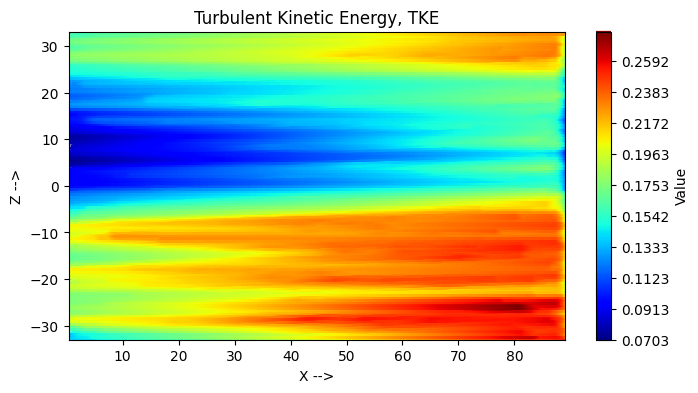

In [33]:
# Creating contour plot of Z_TKE
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, Z_TKE, cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('Turbulent Kinetic Energy, TKE')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

#### $\bullet$ Turbulent Intensity, TI  

1. Reference Vecloity is $\vec{U}_{\text{mean}}$ which varies locally   
$$\text{TI}_{\text{Umean}} = \frac{|\vec{u}_{\text{rms}}|}{|\vec{U}_{\text{mean}}|}$$

2. Reference Vecloity is $\vec{U}_{\text{ref}}$  
$$\text{TI}_{\text{Umean}} = \frac{|\vec{u}_{\text{rms}}|}{|\vec{U}_{\text{ref}}|}$$

In [74]:
# computing |U_mean| = (Umean **2 + Vmean**2)^0.5
U_mean = ((df_800["Umean"]**2+df_800["Vmean"]**2)**0.5).values.reshape(150, 120)

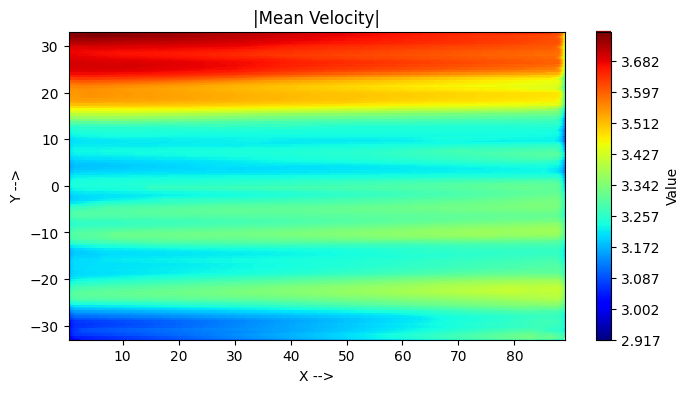

In [25]:
# Creating contour plot of |U_mean|
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, U_mean, cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('|Mean Velocity|')
plt.xlabel('X -->')
plt.ylabel('Y -->')
plt.grid(True)
plt.show()

In [53]:
# Turbulent Intensity using Umean as the Reference
TI_Umean = Z_TKE**0.5/U_mean

In [78]:
pd.DataFrame(TI_Umean).to_csv("TI_Umean.csv")

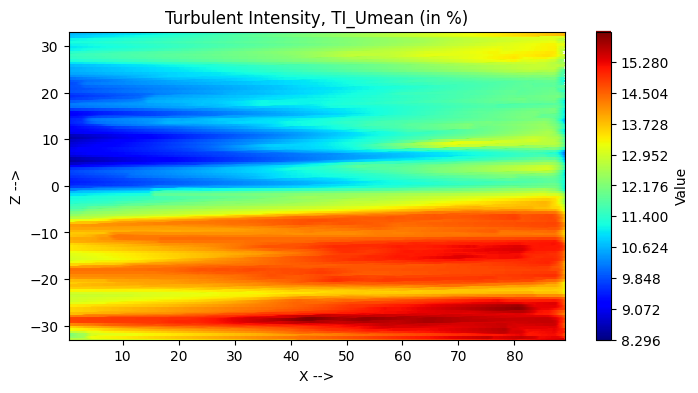

In [66]:
# Creating contour plot of Z_TKE
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, TI_Umean*100, cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('Turbulent Intensity, TI_Umean (in %)')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

In [67]:
U_ref = U_mean.mean()
print("The Reference Speed: Uref = ", U_ref)
# Turbulent Intensity using U_ref as the Reference
TI_Uref = Z_TKE**0.5/U_ref

The Reference Speed: Uref =  3.3330313934563045


In [79]:
pd.DataFrame(TI_Uref).to_csv("TI_Uref.csv")

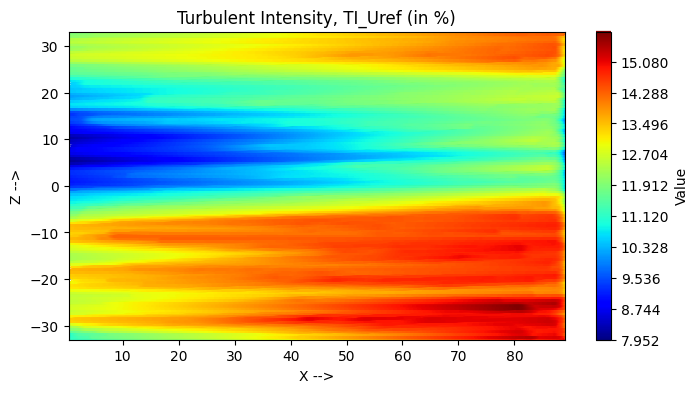

In [68]:
# Creating contour plot of TI_Uref
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, TI_Uref*100, cmap='jet', levels = 1000)
plt.colorbar(contour, label='Value')
plt.title('Turbulent Intensity, TI_Uref (in %)')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

In [69]:
TI_Uref.min()

0.07955393176902742

In [70]:
TI_Uref.max()

0.15846925399037115

In [71]:
TI_Uref.std()

0.016722550253515753

In [72]:
TI_Uref.mean()

0.123952840040113

#### $\bullet$ Analyzing the Total Kinetic Engery, Total_KE  

$$\text{Total\_KE} = \frac{1}{2}\vec{U}\cdot\vec{U}$$

In [80]:
with gzip.open('Total_KE_ratio1_ratio_1_2.pkl.gz', 'rb') as f:
    DF = pickle.load(f)

In [81]:
DF[0].columns

Index(['Total_KE', 'ratio1', 'ratio1_2'], dtype='object')

In [85]:
Total_KE_0 = DF[52]['Total_KE'].values.reshape(150, 120)
Total_KE_0

array([[9.29968, 8.94921, 8.81707, ..., 7.58497, 7.5814 , 7.79541],
       [7.48377, 7.39285, 8.02697, ..., 2.05319, 2.57643, 3.09549],
       [3.33857, 3.56186, 3.85293, ..., 8.6277 , 8.99059, 8.96455],
       ...,
       [8.8773 , 9.01595, 9.50681, ..., 5.79741, 5.91585, 6.09359],
       [6.08484, 5.83801, 5.61536, ..., 2.49018, 2.52348, 2.92192],
       [3.29206, 3.26042, 3.15435, ..., 6.5023 , 6.59661, 6.46123]])

Locator attempting to generate 7587 ticks ([0.67, ..., 15.842]), which exceeds Locator.MAXTICKS (1000).


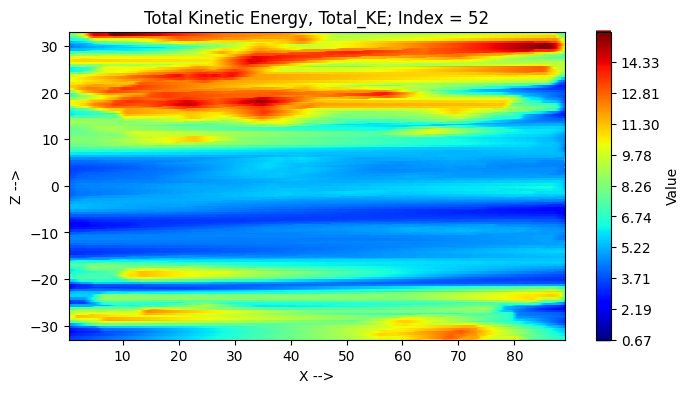

In [86]:
# Creating contour plot of Z_TKE
plt.figure(figsize=(8, 4))
contour = plt.contour(X, Y, Total_KE_0, cmap='jet', levels = 10000)
plt.colorbar(contour, label='Value')
plt.title(f'Total Kinetic Energy, Total_KE; Index = {52}')
plt.xlabel('X -->')
plt.ylabel('Z -->')
plt.grid(True)
plt.show()

Index = 60
The Threshold Value: 10.958


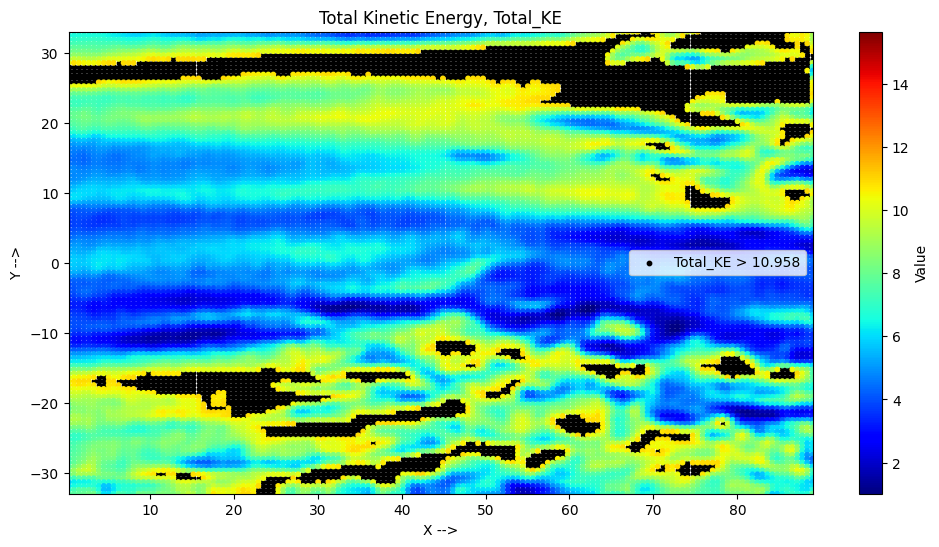

In [87]:
i = np.random.randint(100)
print(f"Index = {i}")

Total_KE_0 = DF[i]['Total_KE'].values.reshape(150, 120)

# Define some Criteria to Decide the Threshold
val = 70
threshold = (Total_KE_0.max()*val/100).round(3)
print(f"The Threshold Value: {threshold}")

# Create masks based on the criterion
mask_above_threshold = Total_KE_0 > threshold
mask_below_threshold = Total_KE_0 <= threshold

# Plot the data points that satisfy the criterion in black
plt.figure(figsize=(12, 6))
sc_above = plt.scatter(X[mask_above_threshold], Y[mask_above_threshold], c='black', s=10, label=f'Total_KE > {threshold}')
sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=Total_KE_0[mask_below_threshold], cmap='jet', s=10, vmin=np.min(Total_KE_0), vmax=np.max(Total_KE_0))
cbar = plt.colorbar(sc_below, label='Value')

plt.title('Total Kinetic Energy, Total_KE')
plt.xlabel('X -->')
plt.ylabel('Y -->')
#plt.grid(True, color='k')
plt.legend()

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))

plt.show()


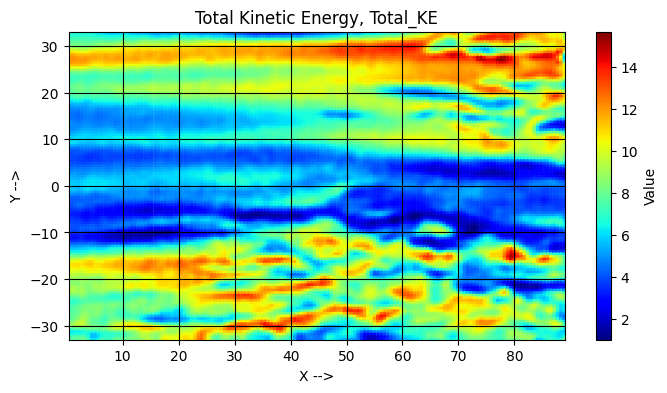

In [88]:
# Create mesh plot with adjusted axis limits
plt.figure(figsize=(8, 4))
sc = plt.scatter(X, Y, c=Total_KE_0, cmap='jet', s=4)  # Using 'viridis' colormap
plt.colorbar(sc, label='Value')
plt.title('Total Kinetic Energy, Total_KE')
plt.xlabel('X -->')
plt.ylabel('Y -->')
plt.grid(True, color='k')

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))

plt.show()

In [89]:
# Load the data from the pickle file
with gzip.open('Total_KE_ratio1_ratio_1_2.pkl.gz', 'rb') as f:
    DF = pickle.load(f)

# Initialize variables to track global maximum and minimum
global_max = float('-inf')  # Initialize to negative infinity
global_min = float('inf')   # Initialize to positive infinity

# Iterate through all frames to find global maximum and minimum
for frame in DF:
    Total_KE = frame['Total_KE'].values
    frame_max = np.max(Total_KE)
    frame_min = np.min(Total_KE)
    if frame_max > global_max:
        global_max = frame_max
    if frame_min < global_min:
        global_min = frame_min

print("Global Maximum Total KE:", global_max)
print("Global Minimum Total KE:", global_min)

Global Maximum Total KE: 20.7204
Global Minimum Total KE: 0.0


Index = 0
The Threshold Value: 8.288


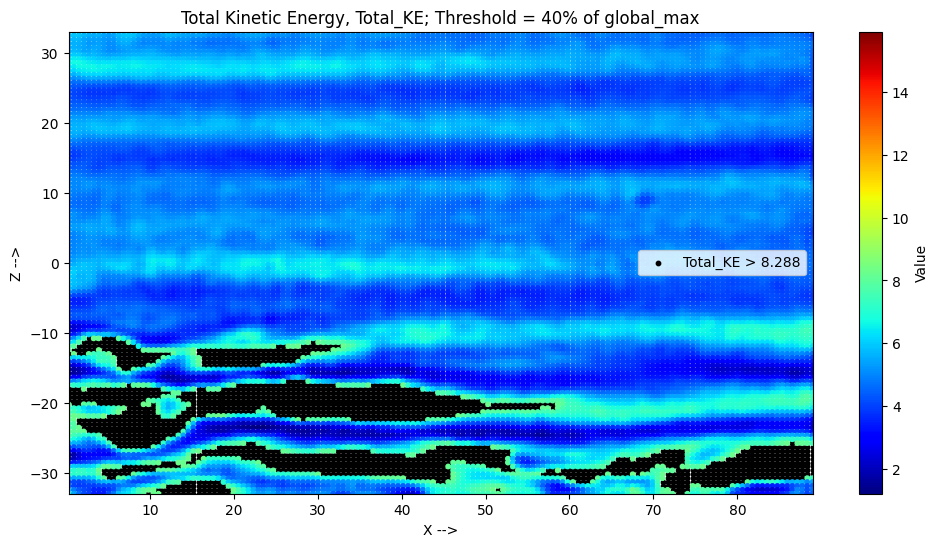

In [103]:
i = 0#np.random.randint(100)
print(f"Index = {i}")

Total_KE_0 = DF[i]['Total_KE'].values.reshape(150, 120)

# Define some Criteria to Decide the Threshold
val = 40
threshold = (global_max*val/100).round(3)
print(f"The Threshold Value: {threshold}")

# Create masks based on the criterion
mask_above_threshold = Total_KE_0 > threshold
mask_below_threshold = Total_KE_0 <= threshold

# Plot the data points that satisfy the criterion in black
plt.figure(figsize=(12, 6))
sc_above = plt.scatter(X[mask_above_threshold], Y[mask_above_threshold], c='black', s=10, label=f'Total_KE > {threshold}')
sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=Total_KE_0[mask_below_threshold], cmap='jet', s=10, vmin=np.min(Total_KE_0), vmax=np.max(Total_KE_0))
cbar = plt.colorbar(sc_below, label='Value')

plt.title(f'Total Kinetic Energy, Total_KE; Threshold = {val}% of global_max')
plt.xlabel('X -->')
plt.ylabel('Z -->')
#plt.grid(True, color='k')
plt.legend()

# Adjust axis limits to fit exactly to the data points
plt.xlim(np.min(X), np.max(X))
plt.ylim(np.min(Y), np.max(Y))

plt.show()


#### Creating a Video of Total_KE

The Threshold Value: 8.288


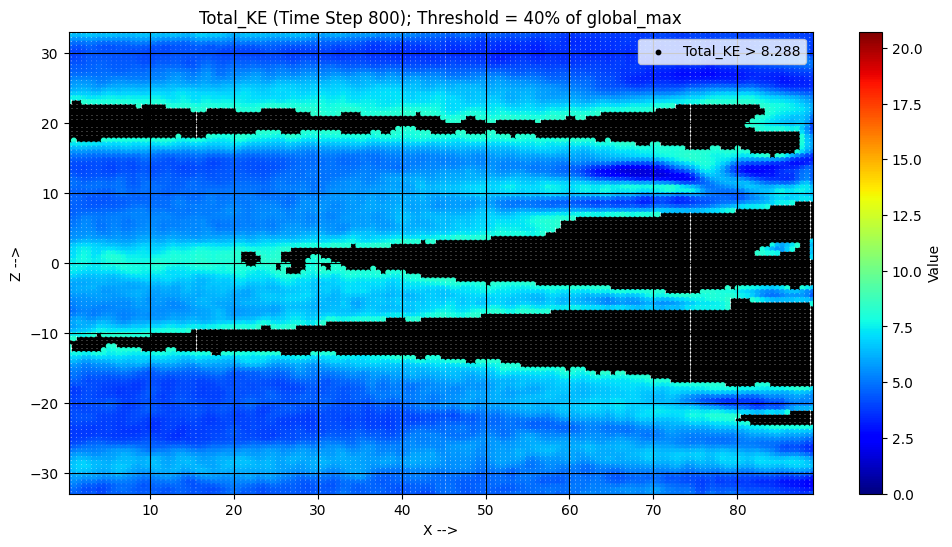

In [104]:
# Load the data from the pickle file
with gzip.open('Total_KE_ratio1_ratio_1_2.pkl.gz', 'rb') as f:
    DF = pickle.load(f)

# Define some Criteria to Decide the Threshold
Total_KE_0 = DF[0]['Total_KE'].values.reshape(150, 120)

val = 40
##########################
threshold = (global_max * val / 100).round(3)
##########################
print(f"The Threshold Value: {threshold}")


# Create a function to update the plot for each frame
def update_plot(i):
    plt.clf()  # Clear the previous plot
    Total_KE = DF[i]['Total_KE'].values.reshape(150, 120)
    
    mask_above_threshold = Total_KE > threshold
    mask_below_threshold = Total_KE <= threshold
    
    sc_above = plt.scatter(X[mask_above_threshold], Y[mask_above_threshold], c='black', s=10, label=f'Total_KE > {threshold}')
    sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=Total_KE[mask_below_threshold], cmap='jet', s=10, vmin=np.min(global_min), vmax=np.max(global_max))
    
    plt.colorbar(sc_below, label='Value')
    plt.title(f'Total_KE (Time Step {i+1}); Threshold = {val}% of global_max')
    plt.xlabel('X -->')
    plt.ylabel('Z -->')
    plt.legend(loc='upper right')
    plt.grid(True, color='k')
    
    plt.xlim(np.min(X), np.max(X))
    plt.ylim(np.min(Y), np.max(Y))
# Create the animation
fig = plt.figure(figsize=(12, 6))
ani = animation.FuncAnimation(fig, update_plot, frames=800, repeat=False)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=8, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as an mp4 file
ani.save(f'Animations/Total_KE_animation_{val}.mp4', writer=writer, dpi = 400)

plt.show()


The Threshold Value: 16.576


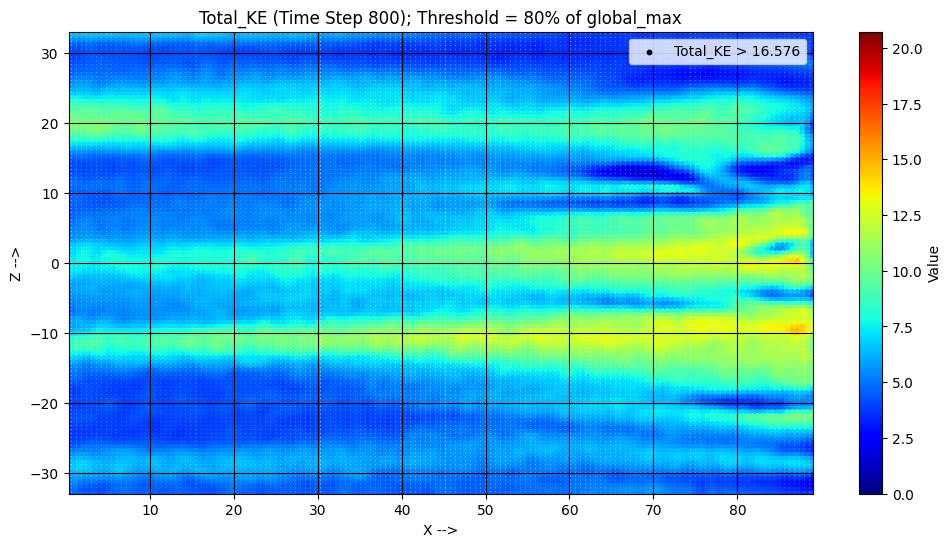

In [105]:
# Load the data from the pickle file
with gzip.open('Total_KE_ratio1_ratio_1_2.pkl.gz', 'rb') as f:
    DF = pickle.load(f)

# Define some Criteria to Decide the Threshold
Total_KE_0 = DF[0]['Total_KE'].values.reshape(150, 120)

val = 80
##########################
threshold = (global_max * val / 100).round(3)
##########################
print(f"The Threshold Value: {threshold}")


# Create a function to update the plot for each frame
def update_plot(i):
    plt.clf()  # Clear the previous plot
    Total_KE = DF[i]['Total_KE'].values.reshape(150, 120)
    
    mask_above_threshold = Total_KE > threshold
    mask_below_threshold = Total_KE <= threshold
    
    sc_above = plt.scatter(X[mask_above_threshold], Y[mask_above_threshold], c='black', s=10, label=f'Total_KE > {threshold}')
    sc_below = plt.scatter(X[mask_below_threshold], Y[mask_below_threshold], c=Total_KE[mask_below_threshold], cmap='jet', s=10, vmin=np.min(global_min), vmax=np.max(global_max))
    
    plt.colorbar(sc_below, label='Value')
    plt.title(f'Total_KE (Time Step {i+1}); Threshold = {val}% of global_max')
    plt.xlabel('X -->')
    plt.ylabel('Z -->')
    plt.legend(loc='upper right')
    plt.grid(True, color='k')
    
    plt.xlim(np.min(X), np.max(X))
    plt.ylim(np.min(Y), np.max(Y))
# Create the animation
fig = plt.figure(figsize=(12, 6))
ani = animation.FuncAnimation(fig, update_plot, frames=800, repeat=False)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=8, metadata=dict(artist='Me'), bitrate=1800)

# Save the animation as an mp4 file
ani.save(f'Animations/Total_KE_animation_{val}.mp4', writer=writer, dpi = 400)

plt.show()
